In [170]:
### Import packages ###
import time
import numpy as np
import math as math
import pandas as pd
import random as random

### Append Path ###
import sys
sys.path.append('..')

### Import functions ###
from utils.Main import *
from utils.Selector import *
from utils.Auxiliary import *
from utils.Prediction import *

# Inputs

In [171]:
data_list = ['concrete_cs',
'concrete_flow',
'concrete_slump',
'yacht',
'housing',
'mpg',
'concrete',
'wine_red',
'wine_white',
'cps',
'no2',
'pm10']

In [172]:
### Get Directory ###
cwd = os.getcwd()
ParentDirectory = os.path.abspath(os.path.join(cwd, "..",".."))

### DataType ###
DataFileInput = "concrete_4"
results_file = os.path.join(ParentDirectory,"Results/simulation_results",DataFileInput+"_results.pkl")
with open(results_file, 'rb') as f:
    all_results = pickle.load(f)


# Simulation Results

## Graph Parameters

In [173]:
### Labels ###
Y_Label = "RMSE"
PlotSubtitle = "Active Learning Performance Comparison on MPG Dataset"


### Colors ###
colors = {
    # Original methods with distinct colors
    'Passive Learning': 'gray',
    'GSx': 'cornflowerblue',
    'GSy': 'salmon',
    'iGS': 'red',

    # WiGS Static methods in shades of green to group them
    'WiGS (Static w_x=0.75)': 'lightgreen',
    'WiGS (Static w_x=0.5)': 'forestgreen',
    'WiGS (Static w_x=0.25)': 'darkgreen',

    # WiGS Time-Decay methods in shades of orange/brown
    'WiGS (Time-Decay, Linear)': 'orange',
    'WiGS (Time-Decay, Exponential)': 'saddlebrown'
}

### Line styles ###
linestyles = {
    'Passive Learning': ':',
    'GSx': ':',
    'GSy': ':',
    'iGS': '-',
    'WiGS (Static w_x=0.75)': '-',
    'WiGS (Static w_x=0.5)': '-.',
    'WiGS (Static w_x=0.25)': '--',
    'WiGS (Time-Decay, Linear)': '-',
    'WiGS (Time-Decay, Exponential)': '-.'
}

### Legend ###
LegendMapping = {
    'Passive Learning': 'Random',
    'GSx': 'GSx',
    'GSy': 'GSy',
    'iGS': 'iGS',
    'WiGS (Static w_x=0.75)': 'WiGS (Static, w_x=0.75)',
    'WiGS (Static w_x=0.5)': 'WiGS (Static, w_x=0.5)',
    'WiGS (Static w_x=0.25)': 'WiGS (Static, w_x=0.25)',
    'WiGS (Time-Decay, Linear)': 'WiGS (Linear Decay)',
    'WiGS (Time-Decay, Exponential)': 'WiGS (Exponential Decay)'
}

## Graph Inputs

In [174]:
### Plots ###
strategies_to_plot = [
    ### Original Methods ###
    # 'Passive Learning',
    # 'GSx',
    # 'GSy',
    'iGS',

    # ### WIGS Methods (Static) ###
    # 'WiGS (Static w_x=0.25)',  # Favors exploration (GSx)
    # 'WiGS (Static w_x=0.5)',   # Balanced approach
    'WiGS (Static w_x=0.75)',  # Favors exploitation (GSy)

    ### WiGS Methods (Time-decayed) ###
    'WiGS (Time-Decay, Linear)',
    'WiGS (Time-Decay, Exponential)',
    ]

filtered_results_to_plot = {key: all_results[key] for key in strategies_to_plot if key in all_results}


## Plot

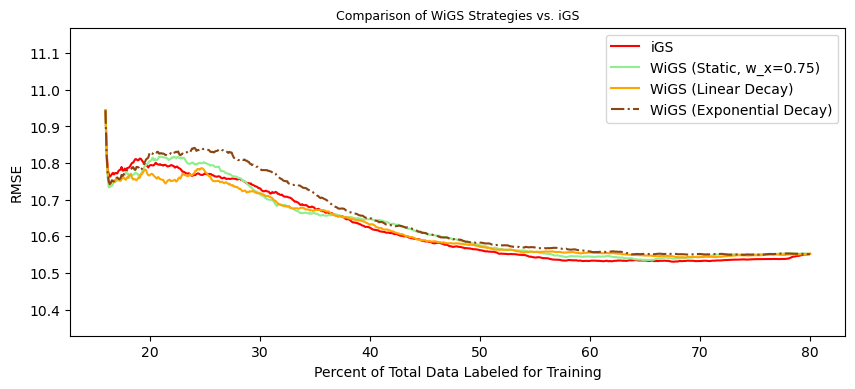

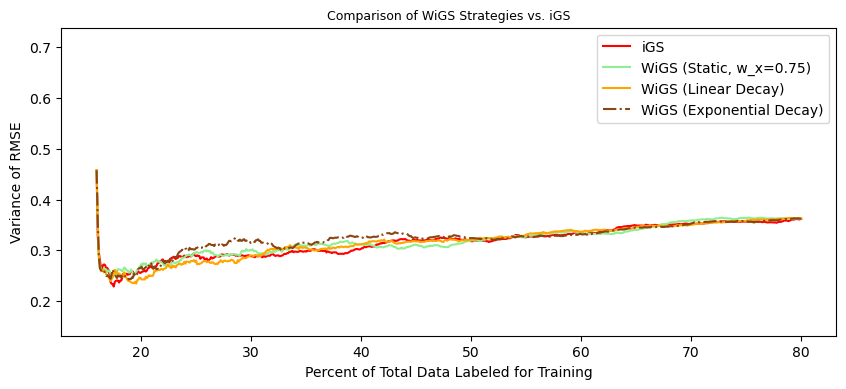

In [175]:
TracePlotMean, TracePlotVariance = MeanVariancePlot(
    RelativeError=None,
    Colors=colors,
    LegendMapping=LegendMapping,
    Linestyles=linestyles,
    Y_Label=Y_Label,
    Subtitle="Comparison of WiGS Strategies vs. iGS", # Updated subtitle
    TransparencyVal=0.00,
    VarInput=True,
    CriticalValue=1.96,
    initial_train_proportion=0.16,
    candidate_pool_proportion=0.64,
    **filtered_results_to_plot # Pass the new, smaller dictionary
)


## Save

In [ ]:
### Save Simulations ###
# file_path = os.path.join("/Users/simondn/Documents/WeightedGreedySampling/Results/simulation_results", f"{DataFileInput}_results.pkl")
# with open(file_path, 'wb') as file:
#     pickle.dump(all_results, file)
    
### Save Trace Plot ###
trace_plot_path = os.path.join("/Users/simondn/Documents/WeightedGreedySampling/Results/images/trace_relative_iGS", f"{DataFileInput}_TracePlot.png")
TracePlotMean.savefig(trace_plot_path, bbox_inches='tight', dpi=300)

### Save Variance Plot ###
variance_plot_path = os.path.join("/Users/simondn/Documents/WeightedGreedySampling/Results/images/variance", f"{DataFileInput}_VariancePlot.png")
TracePlotVariance.savefig(variance_plot_path, bbox_inches='tight', dpi=300)